# SugerCane leaf disease prediction with Mobilenet

In [1]:
import os
import shutil
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-29 20:20:34.260979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 20:20:34.261104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 20:20:34.410875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dir_list = [
 'Banded Chlorosis',
 'Brown Spot',
 'BrownRust',
 'Dried Leaves',
 'Grassy shoot',
 'Healthy Leaves',
 'Pokkah Boeng',
 'Sett Rot',
 'Viral Disease',
 'Yellow Leaf',
 'smut']

for classes in dir_list:
    src_path = '/kaggle/input/sugarcane-leaf-akash/Sugarcane Leaf Image Dataset/All Classes/' + classes
    dst_path = '/kaggle/working/temp/' + classes + '/' + classes
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
    shutil.copytree(src_path, dst_path, dirs_exist_ok=True)

In [3]:


import os
import shutil
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dir_list = [
 'Banded Chlorosis',
 'Brown Spot',
 'BrownRust',
 'Dried Leaves',
 'Grassy shoot',
 'Healthy Leaves',
 'Pokkah Boeng',
 'Sett Rot',
 'Viral Disease',
 'Yellow Leaf',
 'smut']

for classes in dir_list:
    
    kaggle_input_dir = '/kaggle/working/temp/' + classes

    temp_dir = '/kaggle/working/augment/' + classes

    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    generated_images = datagen.flow_from_directory(
        kaggle_input_dir,
        save_to_dir=temp_dir,
        batch_size = 1,
        save_prefix=classes,
        save_format='jpg'
    )

    num_images = max(800, min(800, len(generated_images)))
    for i in range(num_images):
        generated_image = next(generated_images)



Found 471 images belonging to 1 classes.
Found 1722 images belonging to 1 classes.
Found 314 images belonging to 1 classes.
Found 343 images belonging to 1 classes.
Found 346 images belonging to 1 classes.
Found 430 images belonging to 1 classes.
Found 297 images belonging to 1 classes.
Found 652 images belonging to 1 classes.
Found 663 images belonging to 1 classes.
Found 1194 images belonging to 1 classes.
Found 316 images belonging to 1 classes.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import os

# Define dataset paths
dataset_path = '/kaggle/working/augment'
categories = os.listdir(dataset_path)
num_classes = len(categories)

# Load images and labels
def load_data():
    images = []
    labels = []
    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for root, _, files in os.walk(category_path):
            for img_name in files:
                img_path = os.path.join(root, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize images to 224x224
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

images, labels = load_data()

# Ensure that we have loaded images
if len(images) == 0:
    raise Exception("No images loaded. Check dataset path and image files.")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

print("Data loading and preprocessing completed successfully.")


Data loading and preprocessing completed successfully.


## Loading, Preprocessing, and Augmenting Image Dataset

This Python code performs the following tasks:

1. **Imports necessary libraries and modules** for image processing, data manipulation, and machine learning.

2. **Defines dataset paths** and counts the number of classes based on the number of directories in the dataset path.

3. **Loads images and labels** from the dataset path, resizes images to 224x224, and assigns labels based on the directory name.

4. **Splits the data** into training and validation sets.

5. **Normalizes the pixel values** of the images and converts labels to one-hot encoding.

6. **Applies data augmentation** to the training set using `ImageDataGenerator`.

The code ensures that the images are loaded successfully, and prints a message when data loading and preprocessing are completed.

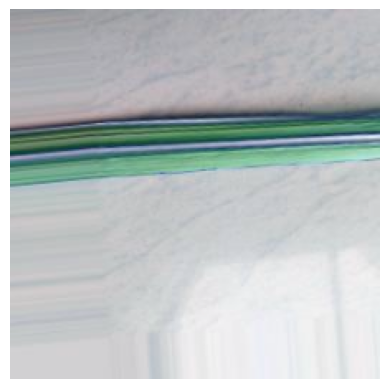

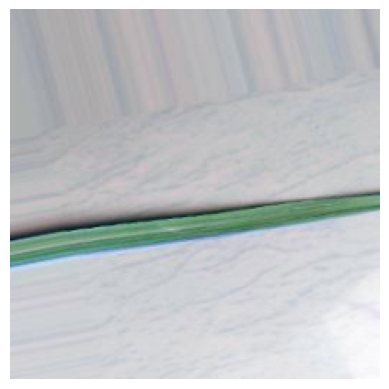

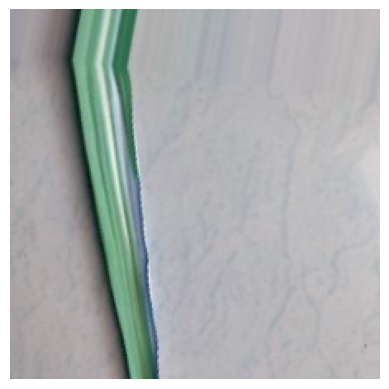

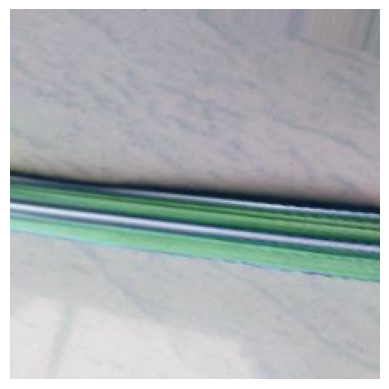

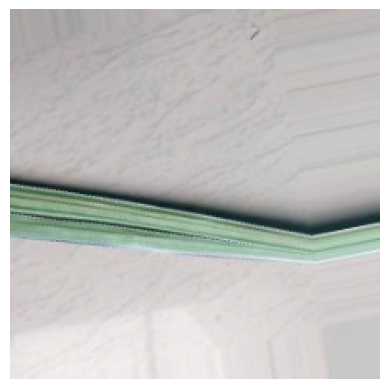

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import VGG16
import seaborn as sns
import PIL

for i in range(5):
    plt.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    plt.show()

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def create_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)  #use softmax in out put layer ............
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenetv2_model = create_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=num_classes)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


This Python code is used to create and configure a MobileNetV2 model for image classification. Here's a brief explanation:

1. **Import necessary modules and libraries:**
   - `MobileNetV2` from `tensorflow.keras.applications` for the base model.
   - `Model` from `tensorflow.keras.models` to create a new model.
   - `Dense`, `GlobalAveragePooling2D` from `tensorflow.keras.layers` for additional layers.
   - `Adam` from `tensorflow.keras.optimizers` for the optimizer.

2. **Define a function `create_mobilenetv2_model` to create a MobileNetV2 model:**
   - Load the MobileNetV2 model with pre-trained weights from ImageNet and without the top layer.
   - Add a global average pooling layer and a dense layer with ReLU activation.
   - Add a final dense layer with softmax activation for classification.
   - Freeze the weights of all layers of the base model.
   - Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric.

3. **Create an instance of the MobileNetV2 model with a specific input shape and number of classes.**

This code is used to create and configure a MobileNetV2 model for classifying images. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and all layers of the base model are frozen to preserve the pre-trained weights.

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks for MobileNetV2 model
callbacks_mobilenetv2 = [
    ModelCheckpoint('mobilenetv2_best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
]

# Train MobileNetV2 model
history_mobilenetv2 = mobilenetv2_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks_mobilenetv2
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/220 ━━━━━━━━━━━━━━━━━━━━ 1:02:11 17s/step - accuracy: 0.0312 - loss: 2.8989

I0000 00:00:1717014298.505065     226 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717014298.538658     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5109 - loss: 1.5218

W0000 00:00:1717014377.597815     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


220/220 ━━━━━━━━━━━━━━━━━━━━ 98s 371ms/step - accuracy: 0.5118 - loss: 1.5182 - val_accuracy: 0.7335 - val_loss: 0.7176
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 76s 336ms/step - accuracy: 0.7162 - loss: 0.7930 - val_accuracy: 0.7648 - val_loss: 0.6322
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 76s 333ms/step - accuracy: 0.7417 - loss: 0.6997 - val_accuracy: 0.7949 - val_loss: 0.5248
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 76s 332ms/step - accuracy: 0.7856 - loss: 0.5744 - val_accuracy: 0.7830 - val_loss: 0.5591
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 76s 334ms/step - accuracy: 0.7900 - loss: 0.5596 - val_accuracy: 0.8256 - val_loss: 0.4607
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 75s 329ms/step - accuracy: 0.8101 - loss: 0.5187 - val_accuracy: 0.8062 - val_loss: 0.4985
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 74s 326ms/step - accuracy: 0.8170 - loss: 0.4822 - val_accuracy: 0.8074 - val_loss: 0.5029
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 75s 332ms/step - accuracy: 0.8127 - loss: 0.4742 - val

In [8]:
loss, accuracy = mobilenetv2_model.evaluate(X_val, y_val)
accuracy

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8770 - loss: 0.2963


0.8761363625526428

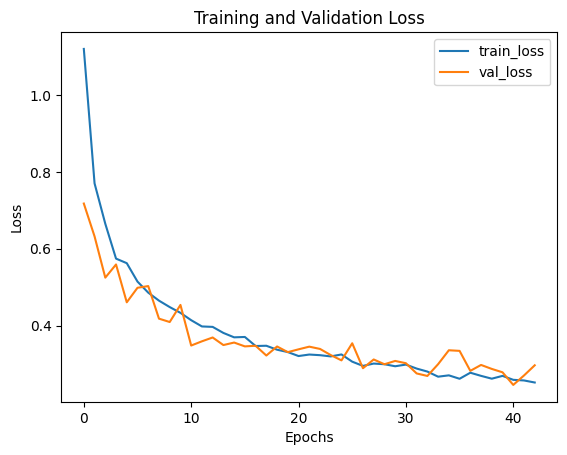

In [9]:
plt.plot(history_mobilenetv2.history['loss'], label='train_loss')
plt.plot(history_mobilenetv2.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

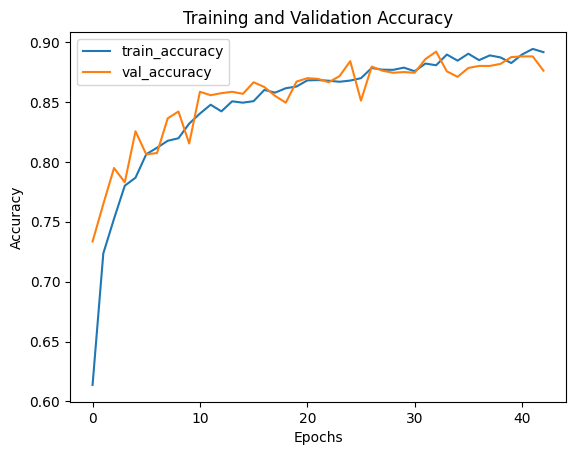

In [10]:
plt.plot(history_mobilenetv2.history['accuracy'], label='train_accuracy')
plt.plot(history_mobilenetv2.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 7/55 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

W0000 00:00:1717017644.945519     224 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


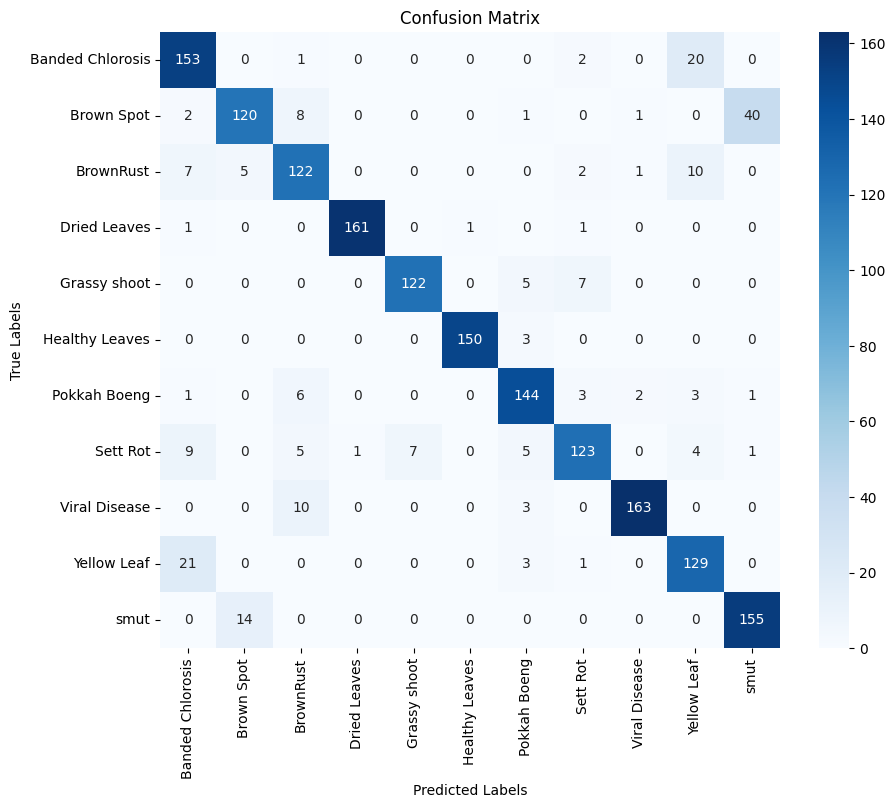

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict labels for the validation set
y_val_pred = mobilenetv2_model.predict(X_val)

# Convert predictions from probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Define class names for better visualization
class_names = dir_list  # The same list used for your classes

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Predict labels for the validation set
y_val_pred = mobilenetv2_model.predict(X_val)

# Convert predictions from probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_val_true_classes = np.argmax(y_val, axis=1)

# Generate a classification report
class_report_dict = classification_report(y_val_true_classes, y_val_pred_classes, target_names=dir_list, output_dict=True)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Display the DataFrame
print(class_report_df)



55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
                  precision    recall  f1-score      support
Banded Chlorosis   0.788660  0.869318  0.827027   176.000000
Brown Spot         0.863309  0.697674  0.771704   172.000000
BrownRust          0.802632  0.829932  0.816054   147.000000
Dried Leaves       0.993827  0.981707  0.987730   164.000000
Grassy shoot       0.945736  0.910448  0.927757   134.000000
Healthy Leaves     0.993377  0.980392  0.986842   153.000000
Pokkah Boeng       0.878049  0.900000  0.888889   160.000000
Sett Rot           0.884892  0.793548  0.836735   155.000000
Viral Disease      0.976048  0.926136  0.950437   176.000000
Yellow Leaf        0.777108  0.837662  0.806250   154.000000
smut               0.786802  0.917160  0.846995   169.000000
accuracy           0.876136  0.876136  0.876136     0.876136
macro avg          0.880949  0.876725  0.876947  1760.000000
weighted avg       0.880147  0.876136  0.876160  1760.000000


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


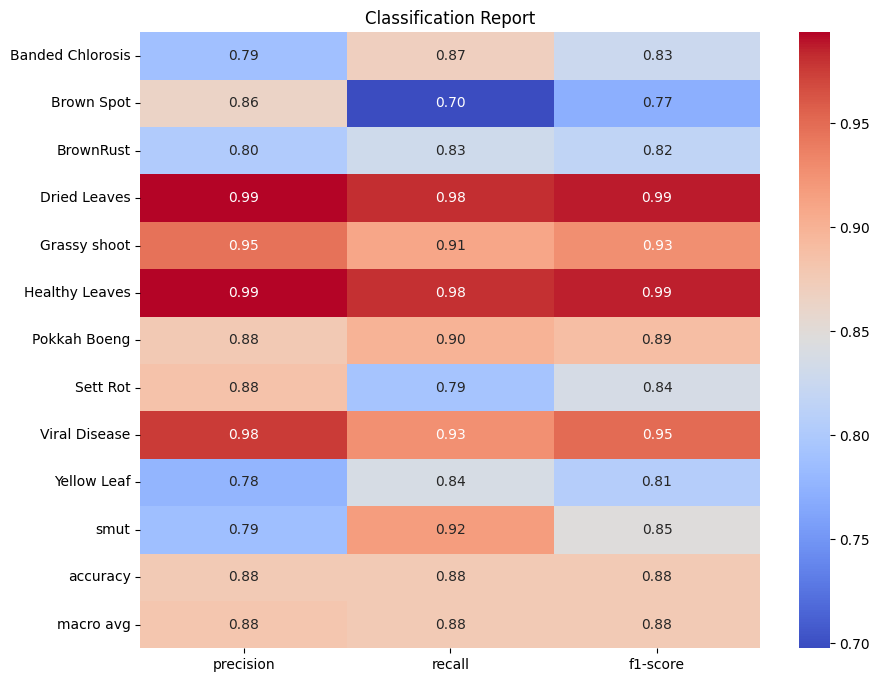

In [13]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the validation set
y_val_pred = mobilenetv2_model.predict(X_val)

# Convert predictions from probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_val_true_classes = np.argmax(y_val, axis=1)

# Generate a classification report
class_report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=dir_list, output_dict=True)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 8))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


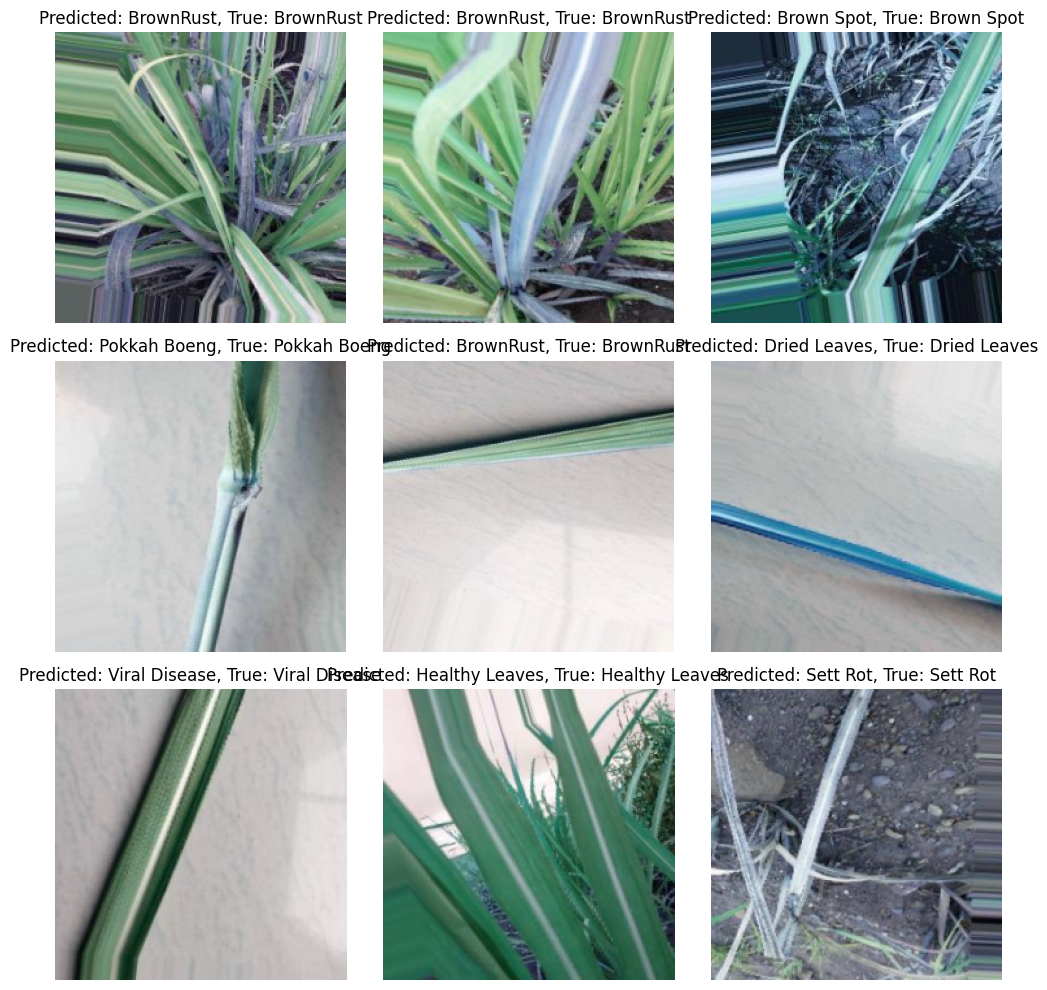

In [15]:
import matplotlib.pyplot as plt
import numpy as np



y_val_pred_prob = mobilenetv2_model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)
y_val_true = np.argmax(y_val, axis=1)


class_names = categories  


def plot_predictions(X, y_true, y_pred, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[i])
        plt.title(f"Predicted: {class_names[y_pred[i]]}, True: {class_names[y_true[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 9 pic: 
plot_predictions(X_val, y_val_true, y_val_pred, class_names, num_images=9)
